## 1. Preliminary

### 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Options pandas
pd.options.mode.chained_assignment = None

### 1.2 Data

In [2]:
# ERP Data
erp = pd.read_csv("erp.csv", sep=";")
print("ERP Dataset - Shape:", erp.shape)

ERP Dataset - Shape: (825, 5)


In [3]:
# Website Data
web = pd.read_csv("web.csv", sep=";")
print("\nWeb Dataset - Shape:", web.shape)


Web Dataset - Shape: (1513, 28)


In [4]:
# Linkage Data
liaison = pd.read_csv("liaison.csv", sep=";")
print("\nLiaison Dataset - Shape:", liaison.shape)


Liaison Dataset - Shape: (825, 2)


## 2. Data preparation

### 2.1 Data Formatting

In [5]:
# Converting variables "product_id" and "onsale_web" to object
erp["product_id"] = erp["product_id"].astype(str)
erp["onsale_web"] = erp["onsale_web"].astype(str)

In [6]:
print("\nERP Dataset Info After Formatting:")
print(erp.info())


ERP Dataset Info After Formatting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    object 
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 32.4+ KB
None


In [7]:
# Converting dichotomous values to object
dichotomous_columns = ["virtual", "post_author", "post_parent", "menu_order"]
web[dichotomous_columns] = web[dichotomous_columns].astype(str)

In [8]:
# Converting date variables to datetime
date_columns = ["post_date", "post_date_gmt", "post_modified", "post_modified_gmt"]
web[date_columns] = web[date_columns].apply(pd.to_datetime)

In [9]:
print("\nWeb Dataset Info After Formatting:")
print(web.info())


Web Dataset Info After Formatting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   object        
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1513 non-null   object        
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             143

In [10]:
# Converting variable "product_id" to object
liaison["product_id"] = liaison["product_id"].astype(str)

In [11]:
print("\nLiaison Dataset Info After Formatting:")
print(liaison.info())


Liaison Dataset Info After Formatting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    object
 1   id_web      734 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB
None


### 2.2 Missing Values

In [12]:
# Checking for missing values in Dataset 1
# No missing values found
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [13]:
# Checking for missing values in Dataset 2
# Observing numerous missing values
web_missing_values = web.isnull().sum()
print("Missing Values in Web Dataset:")
print(web_missing_values)

Missing Values in Web Dataset:
sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                 0
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                 0
guid                       83
menu_order                  0
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [14]:
# Displaying variables with missing values
print("\nVariables with Missing Values:")
print(web_missing_values[web_missing_values > 0])


Variables with Missing Values:
sku                        85
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
guid                       83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [15]:
# Detailed examination of missing values
print("\nDetailed View of Missing Values:")
print(web.loc[web["sku"].isnull(), :])


Detailed View of Missing Values:
     sku virtual  downloadable  rating_count  average_rating  total_sales  \
178  NaN       0             0             0             NaN          NaN   
179  NaN       0             0             0             NaN          NaN   
227  NaN       0             0             0             NaN          NaN   
230  NaN       0             0             0             NaN          NaN   
231  NaN       0             0             0             NaN          NaN   
..   ...     ...           ...           ...             ...          ...   
792  NaN       0             0             0             NaN          NaN   
793  NaN       0             0             0             NaN          NaN   
794  NaN       0             0             0             NaN          NaN   
795  NaN       0             0             0             NaN          NaN   
796  NaN       0             0             0             NaN          NaN   

    tax_status  tax_class post_author pos

In [16]:
web = web.drop(["tax_class", "post_content", "post_content_filtered", "post_password"], axis=1)
web["tax_status"] = web["tax_status"].fillna(method="ffill")
web["post_mime_type"] = web["post_mime_type"].fillna("Non disponible")
web["post_excerpt"] = web["post_excerpt"].fillna("Non disponible")
web["average_rating"] = web["average_rating"].fillna(0)
web["comment_count"] = web["comment_count"].fillna(0)

In [17]:
# Two missing SKU values found, replacing them to retain associated information
web.iloc[[470], [0]] = 0
web.iloc[[471], [0]] = 1
print("\nUpdated Dataset Preview:")
print(web.iloc[470:472])


Updated Dataset Preview:
    sku virtual  downloadable  rating_count  average_rating  total_sales  \
470   0       0             0             0             0.0          0.0   
471   1       0             0             0             0.0          0.0   

    tax_status post_author           post_date       post_date_gmt  ...  \
470    taxable         2.0 2018-07-31 12:07:23 2018-07-31 10:07:23  ...   
471    taxable         2.0 2018-08-08 11:23:43 2018-08-08 09:23:43  ...   

    ping_status                                   post_name  \
470      closed  pierre-jean-villa-cote-rotie-fongeant-2017   
471      closed    pierre-jean-villa-condrieu-suspendu-2018   

          post_modified   post_modified_gmt post_parent  \
470 2019-11-02 13:24:15 2019-11-02 12:24:15         0.0   
471 2019-11-02 13:24:01 2019-11-02 12:24:01         0.0   

                                                  guid menu_order post_type  \
470  https://www.bottle-neck.fr/?post_type=product&...        0.0   prod

In [18]:
# Removing remaining rows with missing SKU values
web = web.dropna(subset=["sku"])

In [19]:
# Dataset 2 after cleaning contains 1430 rows and 24 columns
print("\nWeb Dataset Shape after Cleaning:", web.shape)


Web Dataset Shape after Cleaning: (1430, 24)


In [20]:
# Dataset 3: 91 missing values
# Retaining missing values as they are needed for joins
print("\nMissing Values in Liaison Dataset:")
print(liaison.isnull().sum())


Missing Values in Liaison Dataset:
product_id     0
id_web        91
dtype: int64


### 2.3 Outlier detection<a class="anchor" id="sous_partie1-3"></a>

In [21]:
# No outliers detected in any dataset
for df in [erp, web, liaison]:
    print(df.describe())

            price  stock_quantity
count  825.000000      825.000000
mean    32.415636       26.496970
std     26.795849       45.892422
min      5.200000        0.000000
25%     14.600000        1.000000
50%     24.400000       11.000000
75%     42.000000       34.000000
max    225.000000      578.000000
       downloadable  rating_count  average_rating  total_sales  comment_count
count        1430.0        1430.0          1430.0  1430.000000         1430.0
mean            0.0           0.0             0.0     4.006993            0.0
std             0.0           0.0             0.0     8.510559            0.0
min             0.0           0.0             0.0     0.000000            0.0
25%             0.0           0.0             0.0     0.000000            0.0
50%             0.0           0.0             0.0     1.000000            0.0
75%             0.0           0.0             0.0     4.000000            0.0
max             0.0           0.0             0.0    96.000000        

### 2.4 Duplicate detection<a class="anchor" id="sous_partie1-4"></a>

In [22]:
# Dataset 1: No duplicates found
erp_duplicated = erp[erp.duplicated(keep="last")]
print("\nDuplicate Rows in ERP Dataset:")
print(erp_duplicated)


Duplicate Rows in ERP Dataset:
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


In [23]:
# Dataset 2: Filtering out attachment duplicates based on "sku" and "guid"
web_sku_guid_duplicates = web[web.duplicated(["sku", "guid"])]
print("\nDuplicate Rows in Web Dataset (sku + guid):")
print(web_sku_guid_duplicates)


Duplicate Rows in Web Dataset (sku + guid):
Empty DataFrame
Columns: [sku, virtual, downloadable, rating_count, average_rating, total_sales, tax_status, post_author, post_date, post_date_gmt, post_title, post_excerpt, post_status, comment_status, ping_status, post_name, post_modified, post_modified_gmt, post_parent, guid, menu_order, post_type, post_mime_type, comment_count]
Index: []

[0 rows x 24 columns]


In [24]:
# Dataset 3: No duplicates found
liaison_duplicated = liaison[liaison.duplicated(keep="last")]
print("\nDuplicate Rows in Liaison Dataset:")
print(liaison_duplicated)


Duplicate Rows in Liaison Dataset:
Empty DataFrame
Columns: [product_id, id_web]
Index: []


### 2.5 Resetting index and organizing data

In [25]:
# Fixing an error where "id_web" should be renamed to "sku"
liaison.rename(columns={"id_web": "sku"}, inplace=True)
display(liaison.head())

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [26]:
# Dataset 1
# Resetting index
erp.reset_index(drop=True, inplace=True)

In [27]:
# Dataset 2
# Filtering data to include only "product" type
web_product = web[(web["post_type"] == "product")]
# Selecting relevant columns for analysis
web_product = web_product[["sku", "total_sales", "post_title", "post_excerpt", "post_status", "post_date", "post_modified", "guid"]]
# Resetting index
web_product.reset_index(drop=True, inplace=True)

In [28]:
# Dataset 3
# Resetting index
liaison.reset_index(drop=True, inplace=True)

### 2.6 Merging tables

In [29]:
# Merging tables
def merge_datasets(left_df, right_df, left_on, right_on):
    merged_df = pd.merge(left_df, right_df, how="right", on=left_on, indicator=True)
    merged_df.drop("_merge", axis=1, inplace=True)
    return merged_df

In [30]:
df_erp = merge_datasets(liaison, erp, "product_id", "product_id")
df_web = merge_datasets(liaison, web_product, "sku", "sku")
df_bottleneck = merge_datasets(df_erp, df_web, "product_id", "product_id")

In [31]:
# Cleaning the final merge
df_bottleneck.drop("sku_y", axis=1, inplace=True)
df_bottleneck.rename(columns={"sku_x": "sku"}, inplace=True)
df_bottleneck = df_bottleneck[['product_id', 'sku', 'post_title', 'post_excerpt', 'price', 'total_sales', 'stock_status', 'post_status', 'post_date', 'post_modified']]
df_bottleneck = df_bottleneck.dropna(subset=["sku", "total_sales"])
df_bottleneck.reset_index(drop=True, inplace=True)

In [32]:
# After removing these rows, the dataset contains 734 rows and 10 columns
df_bottleneck.shape

(714, 10)

### 3. Revenue and Sales per Product<a class="anchor" id="partie2"></a>

In [33]:
ca_prod_bottleneck = df_bottleneck[(df_bottleneck["price"] > 0) & (df_bottleneck["total_sales"] > 0)]
quantity_bottleneck = ca_prod_bottleneck["total_sales"].sum()
print("The total number of sales is", round(quantity_bottleneck), "bottles.")

The total number of sales is 2865 bottles.


In [34]:
# Aggregating columns to get the sum of prices and total quantities for each bottle
ca_prod_bottleneck = ca_prod_bottleneck.groupby(["product_id", "sku", "post_title", "stock_status"]).agg({"price": "sum", "total_sales": "sum"}).reset_index()
# Adding the sales revenue column to the dataset
ca_prod_bottleneck["sales_revenue"] = ca_prod_bottleneck["price"] * ca_prod_bottleneck["total_sales"]

In [35]:
# Top 10 bottles by sales revenue
top_10_revenue = ca_prod_bottleneck.nlargest(10, "sales_revenue").reset_index(drop=True)
print("The top 10 bottles by sales revenue are as follows:")
print(top_10_revenue)

The top 10 bottles by sales revenue are as follows:
  product_id    sku                                         post_title  \
0       4334   7818             Champagne Gosset Grand Blanc de Blancs   
1       4144   1662                        Champagne Gosset Grand Rosé   
2       4402   3510                               Cognac Frapin VIP XO   
3       4142  11641              Champagne Gosset Grand Millésime 2006   
4       4141    304                    Champagne Gosset Grande Réserve   
5       4355  12589     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
6       4352  15940     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
7       4153  16237   Elian Daros Côtes du Marmandais Clos Baquey 2015   
8       6206  16580           Domaine Giudicelli Patrimonio Blanc 2019   
9       4068  16416  Gilles Robin Crozes-Hermitage Rouge Papillon 2019   

  stock_status  price  total_sales  sales_revenue  
0   outofstock   49.0         96.0         4704.0  
1      instock   49.0        

In [36]:
# Top 10 best-selling bottles
top_10_sales = ca_prod_bottleneck.nlargest(10, "total_sales").reset_index(drop=True)
print("\nThe top 10 best-selling bottles are as follows:")
print(top_10_sales)


The top 10 best-selling bottles are as follows:
  product_id    sku                                         post_title  \
0       4334   7818             Champagne Gosset Grand Blanc de Blancs   
1       4144   1662                        Champagne Gosset Grand Rosé   
2       4068  16416  Gilles Robin Crozes-Hermitage Rouge Papillon 2019   
3       4200  16295  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
4       4172  16210                   Maurel Pays d'Oc Chardonnay 2019   
5       4187  16189  Le Pas de l'Escalette Languedoc Les Petits Pas...   
6       6206  16580           Domaine Giudicelli Patrimonio Blanc 2019   
7       4141    304                    Champagne Gosset Grande Réserve   
8       4729     38         Emile Boeckel Crémant Brut Blanc de Blancs   
9       6047  16264     Château de La Liquière Faugères L'Ampoule 2019   

  stock_status  price  total_sales  sales_revenue  
0   outofstock   49.0         96.0         4704.0  
1      instock   49.0         87

In [37]:
# Total revenue
ca_bottleneck = ca_prod_bottleneck["sales_revenue"].sum()
print("\nThe total revenue generated online is", round(ca_bottleneck), "€")


The total revenue generated online is 70569 €


## 4. Univariate analysis

### 4.1 Price analysis<a class="anchor" id="sous_partie4-1"></a>

Are there input errors in some product prices?

In [38]:
# Representation of price variable in a table
price_description = ca_prod_bottleneck["price"].describe()
price_counts = ca_prod_bottleneck["price"].value_counts()
price_table = pd.concat([price_counts, price_counts / len(ca_prod_bottleneck)], axis=1)
price_table.columns = ["Frequency", "Relative Frequency"]
price_table["Cumulative Frequency"] = price_table["Relative Frequency"].cumsum()

In [39]:
# Displaying the price table
print("Price Distribution Table:")
display(price_table.head())

Price Distribution Table:


,Frequency,Relative Frequency,Cumulative Frequency
9.9,6,0.015584,0.015584
9.3,6,0.015584,0.031169
19.0,6,0.015584,0.046753
16.3,4,0.010390,0.057143
38.6,4,0.010390,0.067532


Prices appear to be heterogeneous: some are large, some are small, and some are in-between. This makes it difficult to interpret the average (which is very sensitive to atypical values), which here is €26.59.

In France, a bottle of wine costs an average of €6.33 and a bottle of champagne €30.

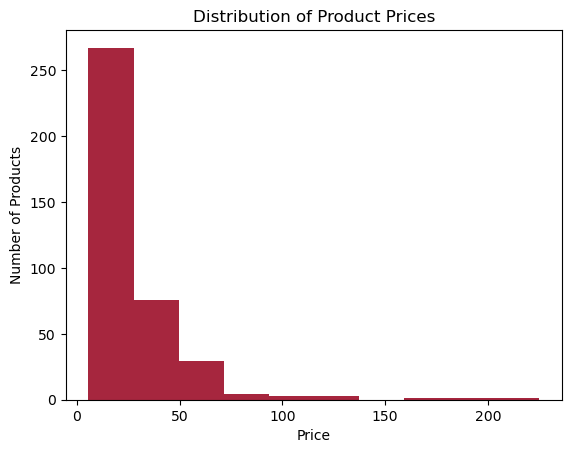

In [40]:
# Price distribution visualization
plt.hist(ca_prod_bottleneck["price"], color="#A6263E")
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")
plt.show()

In [41]:
# Measures of central tendency
mean_price = ca_prod_bottleneck["price"].mean()
median_price = ca_prod_bottleneck["price"].median()
print("\nMeasures of Central Tendency:")
print("Mean:", round(mean_price, 2), "€")
print("Median:", round(median_price), "€")


Measures of Central Tendency:
Mean: 26.58 €
Median: 19 €


In [42]:
# Measures of shape
skewness_price = ca_prod_bottleneck["price"].skew()
kurtosis_price = ca_prod_bottleneck["price"].kurtosis()
print("\nMeasures of Shape:")
print("Skewness:", round(skewness_price, 2))
print("Kurtosis:", round(kurtosis_price, 2))


Measures of Shape:
Skewness: 3.72
Kurtosis: 20.19


In [43]:
# Measures of dispersion
variance_price = ca_prod_bottleneck["price"].var(ddof=0)
std_dev_price = ca_prod_bottleneck["price"].std(ddof=0)
cv_price = std_dev_price / mean_price
print("\nMeasures of Dispersion:")
print("Variance:", round(variance_price, 2))
print("Standard Deviation:", round(std_dev_price, 2), "€")
print("Coefficient of Variation:", round(cv_price, 2))


Measures of Dispersion:
Variance: 620.12
Standard Deviation: 24.9 €
Coefficient of Variation: 0.94


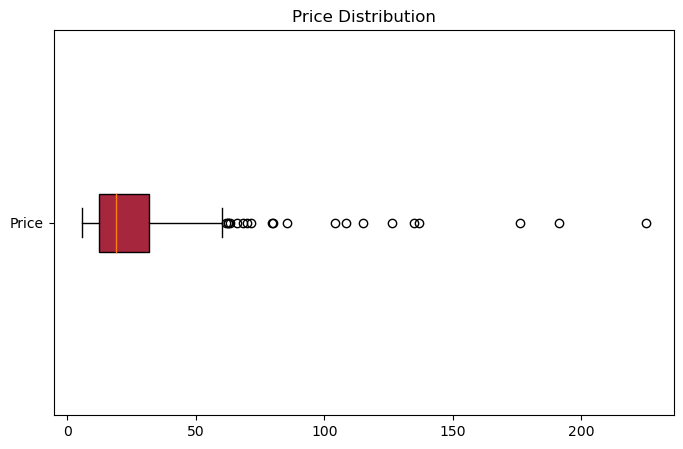

In [44]:
# Visual representation of price dispersion
plt.figure(figsize=(8, 5))
plt.boxplot(ca_prod_bottleneck["price"], patch_artist=True, vert=False, boxprops=dict(facecolor="#A6263E"))
plt.yticks([1], ["Price"])
plt.title("Price Distribution")
plt.show()

### 4.2 Outlier analysis

In [45]:
q1 = np.quantile(ca_prod_bottleneck["price"], 0.25)
q3 = np.quantile(ca_prod_bottleneck["price"], 0.75)
iqr = q3 - q1

print("Interquartile Range (IQR):", round(iqr, 2), "\n")

Interquartile Range (IQR): 19.2 



We therefore have atypical values that we can link to very luxurious bottles (champagne, cognac, vintage, etc.).
These prices therefore do not appear to be errors.

In [46]:
# Outliers Detection
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

outliers = ca_prod_bottleneck["price"][(ca_prod_bottleneck["price"] <= lower_bound) | (ca_prod_bottleneck["price"] >= upper_bound)]

print("Outliers are as follows:\n{}".format(outliers))

Outliers are as follows:
5       80.0
12      71.6
126     69.8
135    225.0
136     79.5
137    126.5
139     85.6
142     62.5
143    176.0
144    108.5
145    104.0
149     61.6
165     62.4
236    137.0
293     65.9
299     63.4
339    191.3
359    135.0
365    115.0
371     68.3
Name: price, dtype: float64


In [47]:
# Outliers Based on Z-Score
ca_prod_bottleneck["zscore"] = (ca_prod_bottleneck["price"] - ca_prod_bottleneck["price"].mean()) / ca_prod_bottleneck["price"].std()

In [48]:
# Threshold for Z-Score
zscore_threshold = 3
high_zscore_outliers = ca_prod_bottleneck[ca_prod_bottleneck["zscore"] > zscore_threshold]

print("\nTop 10 outliers based on Z-Score:")
print(high_zscore_outliers.sort_values("price", ascending=False).reset_index(drop=True)[0:10])


Top 10 outliers based on Z-Score:
  product_id    sku                                         post_title  \
0       4352  15940     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
1       5892  14983  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
2       4402   3510                               Cognac Frapin VIP XO   
3       4904  14220  Domaine Des Croix Corton Charlemagne Grand Cru...   
4       6126  14923             Champagne Gosset Célébris Vintage 2007   
5       4355  12589     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
6       6212  13996  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
7       4404   3507              Cognac Frapin Château de Fontpinot XO   
8       4407   3509                          Cognac Frapin Cigar Blend   

  stock_status  price  total_sales  sales_revenue    zscore  
0   outofstock  225.0          5.0         1125.0  7.957582  
1      instock  191.3          3.0          573.9  6.606043  
2      instock  176.0         13.0    

We can assume that if a zscore is greater than 3, the value is unusual. Here, we can see that the most expensive bottles have the highest zscores. We find the same bottles as with the interquartile range method.

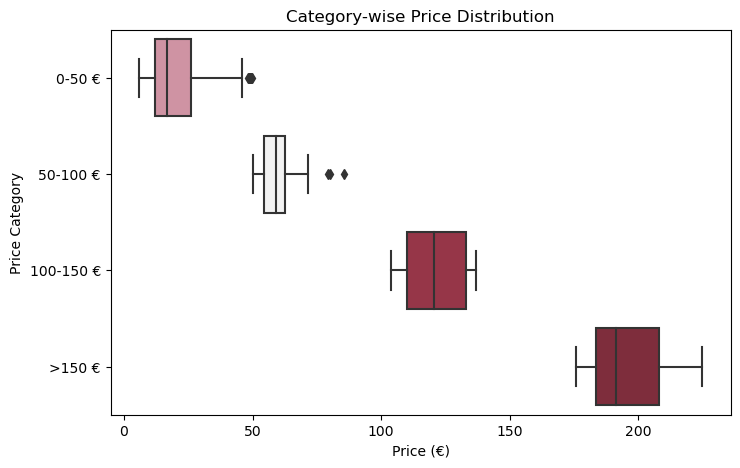

Category [0-50 €] n = 344 - Mean: 20.28 € | Median: 16.90 €
Category [50-100 €] n = 32 - Mean: 60.56 € | Median: 59.00 €
Category [100-150 €] n = 6 - Mean: 121.00 € | Median: 120.75 €
Category [>150 €] n = 3 - Mean: 197.43 € | Median: 191.30 €


In [49]:
# Visualizing price distribution
values = ca_prod_bottleneck["price"]
bins = [0, 50, 100, 150, np.inf]
labels = ["0-50 €", "50-100 €", "100-150 €", ">150 €"]

ca_prod_bottleneck["price_category"] = pd.cut(values, bins=bins, labels=labels, right=False)

fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x="price", y="price_category", data=ca_prod_bottleneck, ax=ax, palette={"0-50 €": "#D9899E", "50-100 €": '#F2F2F2', "100-150 €": '#A6263E', ">150 €": '#8C1F33'})
ax.set_ylabel("Price Category")
ax.set_xlabel("Price (€)")
ax.set_title("Category-wise Price Distribution")
plt.show()

for label in labels:
    category_data = ca_prod_bottleneck[ca_prod_bottleneck["price_category"] == label]["price"]
    print(f"Category [{label}] n = {len(category_data)} - Mean: {category_data.mean():.2f} € | Median: {category_data.median():.2f} €")

In [50]:
# Detailed analysis for categories [0-50 €] and [50-100 €]
for label in ["0-50 €", "50-100 €"]:
    print(f"\nCategory [{label}]:")
    
    # Category data
    category_data = ca_prod_bottleneck[ca_prod_bottleneck["price_category"] == label]["price"]

    # Interquartile range (IQR)
    q1 = category_data.quantile(0.25)
    q3 = category_data.quantile(0.75)
    iqr = q3 - q1
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    
    # Outlier bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Outliers
    outliers = category_data[(category_data < lower_bound) | (category_data > upper_bound)]
    print("Outliers:")
    print(outliers)


Category [0-50 €]:
Interquartile Range (IQR): 14.15
Outliers:
46     49.0
90     48.5
133    49.0
140    49.5
154    49.0
285    49.5
290    48.4
345    48.5
346    49.5
382    49.9
Name: price, dtype: float64

Category [50-100 €]:
Interquartile Range (IQR): 8.33
Outliers:
5      80.0
136    79.5
139    85.6
Name: price, dtype: float64


### 4.3 Univariate analysis of “Sales” variable

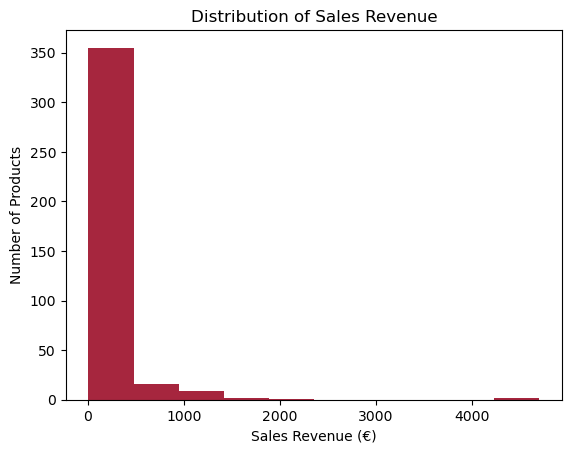

In [51]:
# Histogram for Sales Revenue
plt.hist(ca_prod_bottleneck["sales_revenue"], color="#A6263E")
plt.xlabel("Sales Revenue (€)")
plt.ylabel("Number of Products")
plt.title("Distribution of Sales Revenue")
plt.show()

In [52]:
# Measures of Central Tendency & Dispersion
sales_revenue = ca_prod_bottleneck["sales_revenue"]
mean_sales = sales_revenue.mean()
median_sales = sales_revenue.median()
skewness_sales = sales_revenue.skew()
kurtosis_sales = sales_revenue.kurtosis()

print(f"Mean: {mean_sales:.2f} €")
print(f"Median: {median_sales:.2f} €")
print(f"Skewness: {skewness_sales:.2f}")
print(f"Kurtosis: {kurtosis_sales:.2f}")

Mean: 183.30 €
Median: 81.60 €
Skewness: 7.47
Kurtosis: 72.10


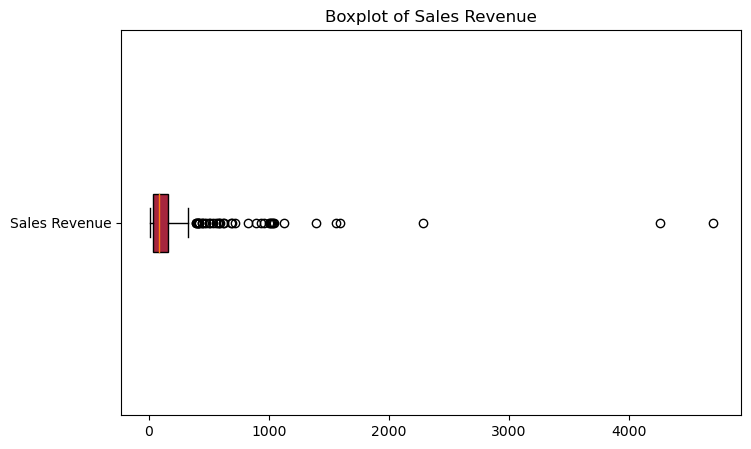

Variance: 159843.11
Standard Deviation: 399.80 €
Coefficient of Variation: 2.18


In [53]:
# Boxplot for Sales Revenue
plt.figure(figsize=(8, 5))
plt.boxplot(sales_revenue, patch_artist=True, vert=False, boxprops=dict(facecolor="#A6263E"))
plt.yticks([1], ["Sales Revenue"])
plt.title("Boxplot of Sales Revenue")
plt.show()

print(f"Variance: {sales_revenue.var(ddof=0):.2f}")
print(f"Standard Deviation: {sales_revenue.std(ddof=0):.2f} €")
print(f"Coefficient of Variation: {sales_revenue.std() / mean_sales:.2f}")

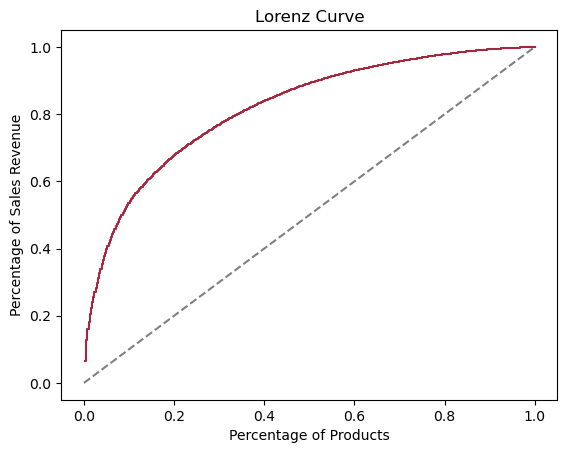

In [54]:
# Lorenz Curve
sorted_revenue = np.sort(sales_revenue)[::-1]
cumulative_revenue = np.cumsum(sorted_revenue)
percentage_products = np.arange(1, len(cumulative_revenue) + 1) / len(cumulative_revenue)
percentage_revenue = cumulative_revenue / cumulative_revenue[-1]

plt.plot(percentage_products, percentage_revenue, drawstyle='steps-post', color="#A6263E")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Lorenz Curve")
plt.xlabel("Percentage of Products")
plt.ylabel("Percentage of Sales Revenue")
plt.show()

In [55]:
# GINI Index
AUC = (percentage_revenue.sum() - percentage_revenue[-1] / 2 - percentage_revenue[0] / 2) / len(percentage_revenue)
gini = 2 * (0.5 - AUC)
print(f"Gini Index: {gini:.2f}")

Gini Index: -0.64


Overall, this indicates that bottles with "atypical" prices have a major influence on sales.

### 4.4 Bivariate analysis of “Number of sales” and “Price” variables

Is the number of sales correlated with price?

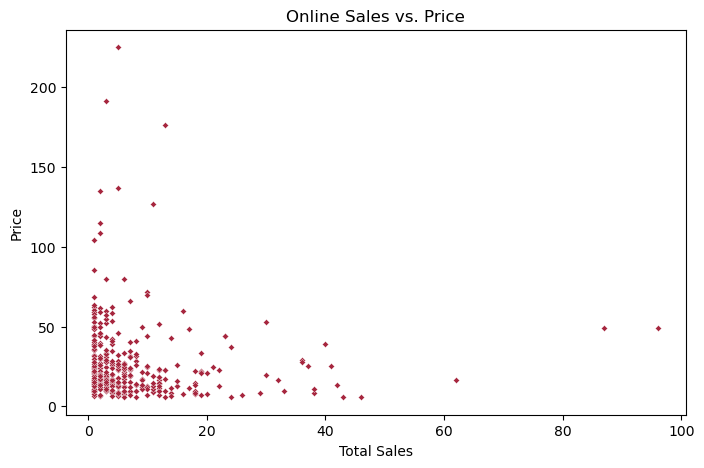

In [56]:
# Scatter plot of Total Sales vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=ca_prod_bottleneck, x="total_sales", y="price", color="#A6263E", marker="D", s=10)
plt.title("Online Sales vs. Price")
plt.xlabel("Total Sales")
plt.ylabel("Price")
plt.show()

In [57]:
# Pearson Correlation Coefficient
pearson_corr = ca_prod_bottleneck["price"].corr(ca_prod_bottleneck["total_sales"])
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")

Pearson Correlation Coefficient: -0.06


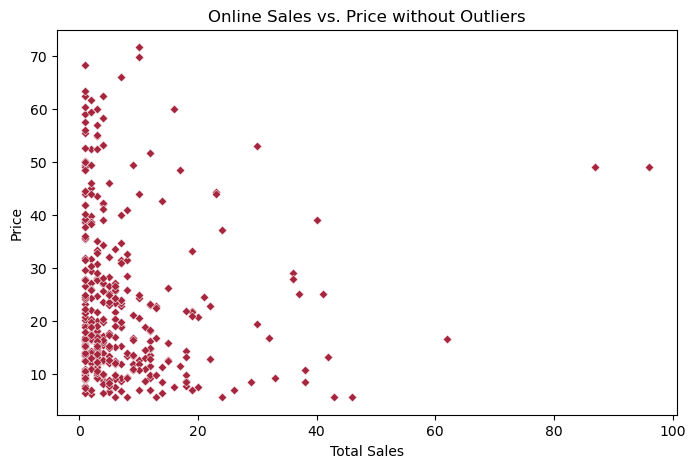

In [58]:
# Scatter plot of Total Sales vs. Price without outliers
plt.figure(figsize=(8, 5))
outliers_filtered = ca_prod_bottleneck[(ca_prod_bottleneck["zscore"] > -2) & (ca_prod_bottleneck["zscore"] < 2)]
sns.scatterplot(data=outliers_filtered, x="total_sales", y="price", color="#A6263E", marker="D", s=20)
plt.title("Online Sales vs. Price without Outliers")
plt.xlabel("Total Sales")
plt.ylabel("Price")
plt.show()

In [59]:
# Pearson Correlation Coefficient without outliers
pearson_corr_no_outliers = outliers_filtered["price"].corr(outliers_filtered["total_sales"])
print(f"Pearson Correlation Coefficient without Outliers: {pearson_corr_no_outliers:.2f}")

Pearson Correlation Coefficient without Outliers: -0.04


Therefore, the price has an influence on the number of sales. Removing the bottles considered 'luxurious', higher-priced bottles tend to generate fewer sales.